In [1]:
!pip install --upgrade torch torchvision transformers

In [2]:
!pip install --upgrade transformers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("/content/drive/MyDrive/emotion_analysis/labels.csv")  # Replace your own
image_folder = '/content/drive/MyDrive/emotion_analysis/images/'  # Replace your own
dataset['image_path'] = dataset['image_name'].apply(lambda x: image_folder + x)
dataset = dataset[dataset['text_corrected'].notna() & (dataset['text_corrected'] != '')]
dataset['overall_sentiment'] = dataset['overall_sentiment'].replace({'very_positive': 2, 'positive': 2, 'neutral': 1, 'very_negative': 0, 'negative': 0})
train_data, temp_data = train_test_split(dataset, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

/tmp/ipython-input-4-2373656742.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['overall_sentiment'] = dataset['overall_sentiment'].replace({'very_positive': 2, 'positive': 2, 'neutral': 1, 'very_negative': 0, 'negative': 0})


In [5]:
from transformers import FlavaModel
from transformers.models.auto.processing_auto import AutoProcessor
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn as nn

processor = AutoProcessor.from_pretrained("facebook/flava-full")
flava_model = FlavaModel.from_pretrained("facebook/flava-full")

# Dataset class
class MultimodalDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.max_length = 128

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = self.data.iloc[index]["text_corrected"]
        image_path = self.data.iloc[index]["image_path"]
        try:
            image = Image.open(image_path).convert("RGB")
        except Exception as e:
            print(f"加载图像 {image_path} 时出错：{e}")
            return None
        labels = self.data.iloc[index]['overall_sentiment']
        inputs = processor(text=text, images=image, return_tensors="pt", padding="max_length", max_length=self.max_length, truncation=True)

        input_ids = inputs['input_ids'][0]
        token_type_ids = inputs['token_type_ids'][0]
        attention_mask = inputs['attention_mask'][0]
        pixel_values = inputs['pixel_values'][0]

        return input_ids, token_type_ids, attention_mask, pixel_values, torch.tensor(labels, dtype=torch.long)

val_dataset = MultimodalDataset(val_data)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_dataset = MultimodalDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/358 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 1, Loss: 1.1005558967590332
Epoch 1, Loss: 1.0926814079284668
Epoch 1, Loss: 1.1159088611602783
Epoch 1, Loss: 1.05800461769104
Epoch 1, Loss: 1.0242255926132202
Epoch 1, Loss: 1.1475757360458374
Epoch 1, Loss: 0.994127631187439
Epoch 1, Loss: 0.9420560598373413
Epoch 1, Loss: 0.9226347208023071
Epoch 1, Loss: 0.8264847993850708
Epoch 1, Loss: 1.2111278772354126
Epoch 1, Loss: 0.8302063941955566
Epoch 1, Loss: 1.1097846031188965
Epoch 1, Loss: 1.0556360483169556
Epoch 1, Loss: 1.1146667003631592
Epoch 1, Loss: 0.8676810264587402
Epoch 1, Loss: 0.923623263835907
Epoch 1, Loss: 0.9151415228843689
Epoch 1, Loss: 0.8310357332229614
Epoch 1, Loss: 0.9021977782249451
Epoch 1, Loss: 0.9517886638641357
Epoch 1, Loss: 1.0729405879974365
Epoch 1, Loss: 1.172269344329834
Epoch 1, Loss: 0.9788129329681396
Epoch 1, Loss: 0.939504861831665
Epoch 1, Loss: 1.0739648342132568
Epoch 1, Loss: 0.8720352649688721
Epoch 1, Loss: 1.3365178108215332
Epoch 1, Loss: 0.9245468378067017
Epoch 1, Loss: 0.924

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Loss: 0.9017268419265747
Epoch 1, Loss: 0.6194077134132385
Epoch 1, Loss: 0.7067162394523621
Epoch 1, Loss: 0.994051456451416
Epoch 1, Loss: 0.8149515986442566
Epoch 1, Loss: 0.995050311088562
Epoch 1, Loss: 0.6984258890151978
Epoch 1, Loss: 0.9958266019821167
Epoch 1, Loss: 0.8770922422409058
Epoch 1, Loss: 0.9641445875167847
Epoch 1, Loss: 0.6068804264068604
Epoch 1, Loss: 0.7793501615524292
Epoch 1, Loss: 1.162482738494873
Epoch 1, Loss: 0.7456929087638855
Epoch 1, Loss: 0.6936324238777161
Epoch 1, Loss: 0.8293908834457397
Epoch 1, Loss: 0.7464312314987183
Epoch 1, Loss: 0.9934434294700623
Epoch 1, Loss: 1.3566913604736328
Epoch 1, Loss: 0.5959374904632568
Epoch 1, Loss: 0.9070314168930054
Epoch 1, Loss: 0.9063141345977783
Epoch 1, Loss: 1.037626028060913
Epoch 1, Loss: 0.8078896403312683
Epoch 1, Loss: 1.230557918548584
Epoch 1, Loss: 1.433424711227417
Epoch 1, Loss: 1.3268120288848877
Epoch 1, Loss: 0.6852370500564575
Epoch 1, Loss: 0.9999732971191406
Epoch 1, Loss: 1.234

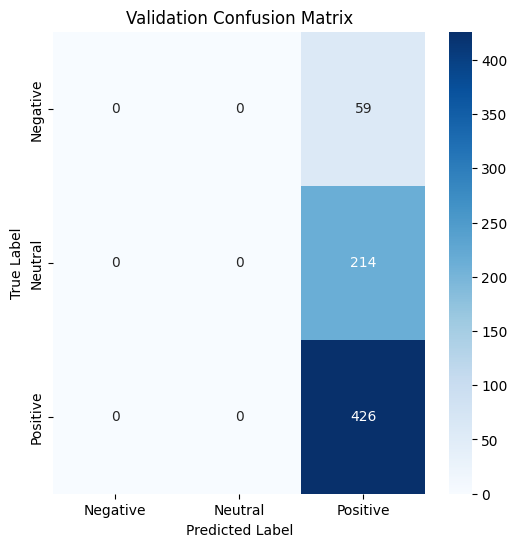

Epoch 1: New best validation accuracy (0.6094), model saved.


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 2, Loss: 0.6776262521743774
Epoch 2, Loss: 0.9146097898483276
Epoch 2, Loss: 0.8340269327163696
Epoch 2, Loss: 0.8328649997711182
Epoch 2, Loss: 1.1574403047561646
Epoch 2, Loss: 0.8403114676475525
Epoch 2, Loss: 1.1577274799346924
Epoch 2, Loss: 0.6011157631874084
Epoch 2, Loss: 0.6762835383415222
Epoch 2, Loss: 1.0798945426940918
Epoch 2, Loss: 0.674933910369873
Epoch 2, Loss: 0.6742792129516602
Epoch 2, Loss: 1.0772594213485718
Epoch 2, Loss: 0.9964828491210938
Epoch 2, Loss: 0.9150280356407166
Epoch 2, Loss: 1.4026856422424316
Epoch 2, Loss: 1.2404325008392334
Epoch 2, Loss: 0.7553057670593262
Epoch 2, Loss: 0.5915095210075378
Epoch 2, Loss: 0.6735122203826904
Epoch 2, Loss: 1.1617224216461182
Epoch 2, Loss: 0.7566441893577576
Epoch 2, Loss: 0.9143095016479492
Epoch 2, Loss: 0.7567176818847656
Epoch 2, Loss: 0.9135976433753967
Epoch 2, Loss: 1.2328110933303833
Epoch 2, Loss: 0.7576943039894104
Epoch 2, Loss: 1.0694217681884766
Epoch 2, Loss: 0.9133065342903137
Epoch 2, Loss: 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2, Loss: 0.7511343359947205
Epoch 2, Loss: 1.2458677291870117
Epoch 2, Loss: 0.9157902002334595
Epoch 2, Loss: 0.834174394607544
Epoch 2, Loss: 0.99724280834198
Epoch 2, Loss: 0.7524449229240417
Epoch 2, Loss: 0.8328561782836914
Epoch 2, Loss: 0.8313032388687134
Epoch 2, Loss: 0.6746280193328857
Epoch 2, Loss: 0.674561619758606
Epoch 2, Loss: 0.7510452270507812
Epoch 2, Loss: 1.1629555225372314
Epoch 2, Loss: 0.7501169443130493
Epoch 2, Loss: 1.4848525524139404
Epoch 2, Loss: 1.2383697032928467
Epoch 2, Loss: 1.0666069984436035
Epoch 2, Loss: 0.9192266464233398
Epoch 2, Loss: 0.9907052516937256
Epoch 2, Loss: 0.7528947591781616
Epoch 2, Loss: 0.7528089284896851
Epoch 2, Loss: 0.8867875933647156
Epoch 2, Loss: 0.9219302535057068
Epoch 2, Loss: 0.6260379552841187
Epoch 2, Loss: 0.6268383264541626
Epoch 2, Loss: 0.6898259520530701
Epoch 2, Loss: 0.6883087158203125
Epoch 2, Loss: 1.1590158939361572
Epoch 2, Loss: 0.9889917969703674
Epoch 2, Loss: 0.9889613389968872
Epoch 2, Loss: 0.9

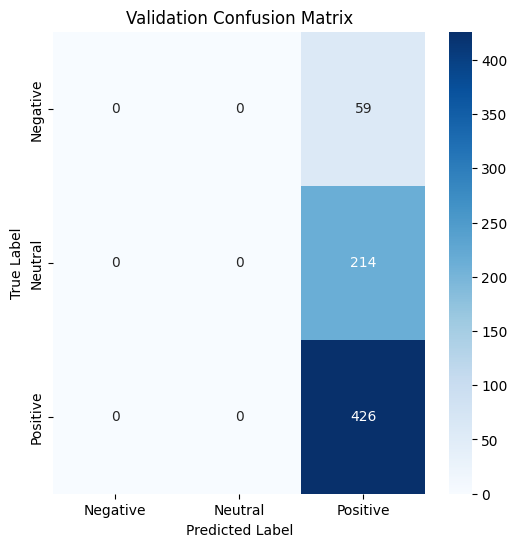

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 3, Loss: 0.6704368591308594
Epoch 3, Loss: 1.1687016487121582
Epoch 3, Loss: 0.6709229350090027
Epoch 3, Loss: 1.0835082530975342
Epoch 3, Loss: 1.1591496467590332
Epoch 3, Loss: 0.5866494178771973
Epoch 3, Loss: 1.0764882564544678
Epoch 3, Loss: 0.992668867111206
Epoch 3, Loss: 0.9163644909858704
Epoch 3, Loss: 1.230149745941162
Epoch 3, Loss: 1.0681183338165283
Epoch 3, Loss: 1.3858286142349243
Epoch 3, Loss: 1.2741212844848633
Epoch 3, Loss: 1.0366452932357788
Epoch 3, Loss: 0.6399064064025879
Epoch 3, Loss: 0.7381517291069031
Epoch 3, Loss: 0.9764618277549744
Epoch 3, Loss: 0.827824056148529
Epoch 3, Loss: 0.7635555267333984
Epoch 3, Loss: 0.9851936101913452
Epoch 3, Loss: 0.8270430564880371
Epoch 3, Loss: 0.8590113520622253
Epoch 3, Loss: 0.8241899609565735
Epoch 3, Loss: 0.9822402596473694
Epoch 3, Loss: 0.8227478861808777
Epoch 3, Loss: 0.8635497093200684
Epoch 3, Loss: 0.6424586772918701
Epoch 3, Loss: 0.8820680379867554
Epoch 3, Loss: 0.6396251320838928
Epoch 3, Loss: 0.

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 3, Loss: 0.9455721974372864
Epoch 3, Loss: 1.003109335899353
Epoch 3, Loss: 1.1822640895843506
Epoch 3, Loss: 0.5808581113815308
Epoch 3, Loss: 0.998914361000061
Epoch 3, Loss: 0.7560668587684631
Epoch 3, Loss: 0.7555543780326843
Epoch 3, Loss: 0.7553924322128296
Epoch 3, Loss: 1.2389965057373047
Epoch 3, Loss: 0.9954781532287598
Epoch 3, Loss: 1.3193765878677368
Epoch 3, Loss: 0.8314058780670166
Epoch 3, Loss: 0.9924918413162231
Epoch 3, Loss: 0.7694610357284546
Epoch 3, Loss: 0.7555262446403503
Epoch 3, Loss: 1.314098834991455
Epoch 3, Loss: 1.1507127285003662
Epoch 3, Loss: 0.6852723360061646
Epoch 3, Loss: 0.6140535473823547
Epoch 3, Loss: 1.1350791454315186
Epoch 3, Loss: 0.6867246627807617
Epoch 3, Loss: 0.7596619725227356
Epoch 3, Loss: 0.9887557029724121
Epoch 3, Loss: 0.6140303611755371
Epoch 3, Loss: 0.8328768014907837
Epoch 3, Loss: 1.2195887565612793
Epoch 3, Loss: 0.6122394800186157
Epoch 3, Loss: 0.9900550842285156
Epoch 3, Loss: 0.841656506061554
Epoch 3, Loss: 0.9

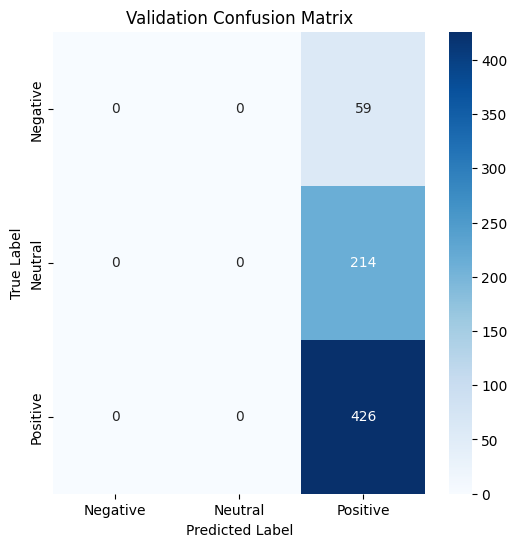

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 4, Loss: 0.7059674859046936
Epoch 4, Loss: 0.8057156801223755
Epoch 4, Loss: 0.8040067553520203
Epoch 4, Loss: 1.0379126071929932
Epoch 4, Loss: 1.0270601511001587
Epoch 4, Loss: 0.9824891090393066
Epoch 4, Loss: 1.0305904150009155
Epoch 4, Loss: 0.8428127765655518
Epoch 4, Loss: 0.9390077590942383
Epoch 4, Loss: 1.164821743965149
Epoch 4, Loss: 0.7552160024642944
Epoch 4, Loss: 0.9013880491256714
Epoch 4, Loss: 0.7108504772186279
Epoch 4, Loss: 0.6342306733131409
Epoch 4, Loss: 0.9303945899009705
Epoch 4, Loss: 1.1707992553710938
Epoch 4, Loss: 0.989664614200592
Epoch 4, Loss: 0.9244812726974487
Epoch 4, Loss: 0.8026537895202637
Epoch 4, Loss: 0.747661828994751
Epoch 4, Loss: 0.9816684722900391
Epoch 4, Loss: 0.9287146925926208
Epoch 4, Loss: 0.8574405908584595
Epoch 4, Loss: 0.985490083694458
Epoch 4, Loss: 1.056670069694519
Epoch 4, Loss: 0.6842814683914185
Epoch 4, Loss: 0.6873555779457092
Epoch 4, Loss: 0.9156073331832886
Epoch 4, Loss: 0.9903729557991028
Epoch 4, Loss: 1.06

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 4, Loss: 1.087174892425537
Epoch 4, Loss: 0.7729146480560303
Epoch 4, Loss: 0.9100744724273682
Epoch 4, Loss: 0.9464541077613831
Epoch 4, Loss: 0.8135007619857788
Epoch 4, Loss: 0.9215505123138428
Epoch 4, Loss: 1.150112271308899
Epoch 4, Loss: 1.1627676486968994
Epoch 4, Loss: 0.919244110584259
Epoch 4, Loss: 0.7155321836471558
Epoch 4, Loss: 0.7415596842765808
Epoch 4, Loss: 0.9218209981918335
Epoch 4, Loss: 0.9662564396858215
Epoch 4, Loss: 0.7860524654388428
Epoch 4, Loss: 0.7558912038803101
Epoch 4, Loss: 0.7371655702590942
Epoch 4, Loss: 0.7104793787002563
Epoch 4, Loss: 0.6164239645004272
Epoch 4, Loss: 1.4330875873565674
Epoch 4, Loss: 0.8312341570854187
Epoch 4, Loss: 0.9255717396736145
Epoch 4, Loss: 1.030604362487793
Epoch 4, Loss: 0.765705943107605
Epoch 4, Loss: 0.9147765636444092
Epoch 4, Loss: 0.9248353242874146
Epoch 4, Loss: 0.5084429979324341
Epoch 4, Loss: 0.70978844165802
Epoch 4, Loss: 0.8979284763336182
Epoch 4, Loss: 0.850524365901947
Epoch 4, Loss: 0.70501

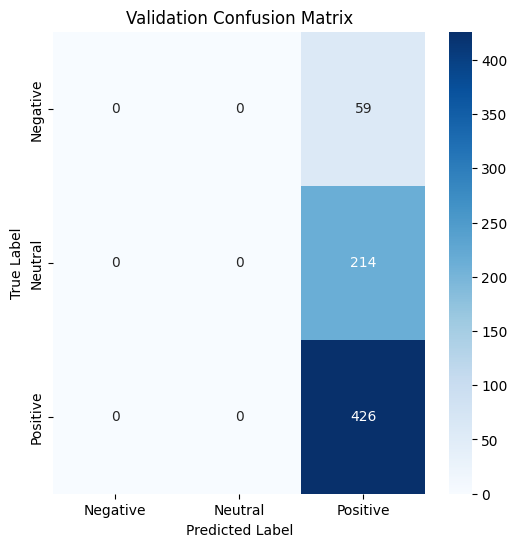

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 5, Loss: 0.8345378637313843
Epoch 5, Loss: 1.0993117094039917
Epoch 5, Loss: 0.7645834684371948
Epoch 5, Loss: 0.7751028537750244
Epoch 5, Loss: 0.6554884314537048
Epoch 5, Loss: 1.15450119972229
Epoch 5, Loss: 0.7862421274185181
Epoch 5, Loss: 0.9262701272964478
Epoch 5, Loss: 0.5973324775695801
Epoch 5, Loss: 0.9939968585968018
Epoch 5, Loss: 0.8146247267723083
加载图像 /content/drive/MyDrive/emotion_analysis/images/image_5119.png 时出错：image file is truncated
Epoch 5, Loss: 0.6813117861747742
Epoch 5, Loss: 0.9060362577438354
Epoch 5, Loss: 0.6834390163421631
Epoch 5, Loss: 0.9803163409233093
Epoch 5, Loss: 1.1649539470672607
Epoch 5, Loss: 0.7478341460227966
Epoch 5, Loss: 1.2271595001220703
Epoch 5, Loss: 0.6994668245315552
Epoch 5, Loss: 0.5914710164070129
Epoch 5, Loss: 0.962798535823822
Epoch 5, Loss: 0.5846201181411743
Epoch 5, Loss: 0.8320657014846802
Epoch 5, Loss: 1.1193146705627441
Epoch 5, Loss: 0.8253428339958191
Epoch 5, Loss: 0.890207052230835
Epoch 5, Loss: 0.68414038

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5, Loss: 0.7177585363388062
Epoch 5, Loss: 0.6762372255325317
Epoch 5, Loss: 0.6284409761428833
Epoch 5, Loss: 0.4594041109085083
Epoch 5, Loss: 0.5510958433151245
Epoch 5, Loss: 0.5339120030403137
Epoch 5, Loss: 0.38212698698043823
Epoch 5, Loss: 0.6854922771453857
Epoch 5, Loss: 0.5943177938461304
Epoch 5, Loss: 1.001441478729248
Epoch 5, Loss: 0.8379251956939697
Epoch 5, Loss: 0.911684513092041
Epoch 5, Loss: 0.2756592035293579
Epoch 5, Loss: 1.3275030851364136
Epoch 5, Loss: 0.8058390617370605
Epoch 5, Loss: 0.6125513315200806
Epoch 5, Loss: 0.7225830554962158
Epoch 5, Loss: 0.7441298961639404
Epoch 5, Loss: 0.9611899852752686
Epoch 5, Loss: 0.5807051062583923
Epoch 5, Loss: 0.6540024876594543
Epoch 5, Loss: 0.6209369897842407
Epoch 5, Loss: 0.8465626239776611
Epoch 5, Loss: 0.8358070850372314
Epoch 5, Loss: 0.4714459478855133
Epoch 5, Loss: 0.49487045407295227
Epoch 5, Loss: 0.44343656301498413
Epoch 5, Loss: 0.8745687007904053
Epoch 5, Loss: 0.7562626600265503
Epoch 5, Loss

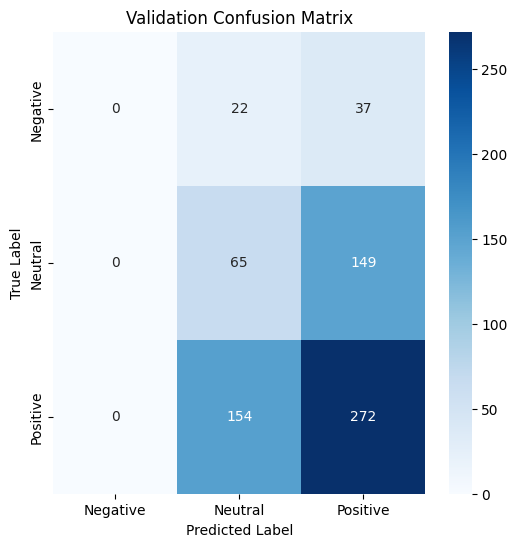

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 6, Loss: 0.4322814345359802
Epoch 6, Loss: 0.2463773488998413
Epoch 6, Loss: 0.3227075934410095
Epoch 6, Loss: 0.4998627305030823
Epoch 6, Loss: 0.298868864774704
Epoch 6, Loss: 0.4509294629096985
Epoch 6, Loss: 0.4728308916091919
Epoch 6, Loss: 0.5452561974525452
Epoch 6, Loss: 0.37888041138648987
Epoch 6, Loss: 0.7776352167129517
Epoch 6, Loss: 0.40705692768096924
Epoch 6, Loss: 0.2712259292602539
Epoch 6, Loss: 0.6360505223274231
Epoch 6, Loss: 0.4534337520599365
Epoch 6, Loss: 0.5607295632362366
Epoch 6, Loss: 0.48362183570861816
Epoch 6, Loss: 0.5446527004241943
Epoch 6, Loss: 0.7176993489265442
Epoch 6, Loss: 0.5372287631034851
Epoch 6, Loss: 0.22538986802101135
Epoch 6, Loss: 0.553525447845459
Epoch 6, Loss: 0.4499811828136444
Epoch 6, Loss: 0.3495468199253082
Epoch 6, Loss: 0.9707236886024475
Epoch 6, Loss: 0.7760733366012573
Epoch 6, Loss: 0.6488510370254517
Epoch 6, Loss: 0.4978862404823303
Epoch 6, Loss: 0.6297805309295654
Epoch 6, Loss: 0.8865038156509399
Epoch 6, Los

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 6, Loss: 1.1901315450668335
Epoch 6, Loss: 0.3710971474647522
Epoch 6, Loss: 0.10389090329408646
Epoch 6, Loss: 0.3784772455692291
Epoch 6, Loss: 0.5746159553527832
Epoch 6, Loss: 0.33406728506088257
Epoch 6, Loss: 0.53333979845047
Epoch 6, Loss: 0.3089655935764313
Epoch 6, Loss: 0.08080149441957474
Epoch 6, Loss: 0.4832104742527008
Epoch 6, Loss: 0.342246413230896
Epoch 6, Loss: 0.4536297917366028
Epoch 6, Loss: 0.20403225719928741
Epoch 6, Loss: 0.21211570501327515
Epoch 6, Loss: 0.7466711401939392
Epoch 6, Loss: 1.14287269115448
Epoch 6, Loss: 0.4046066701412201
Epoch 6, Loss: 0.10126788914203644
Epoch 6, Loss: 0.7764566540718079
Epoch 6, Loss: 0.3796716034412384
Epoch 6, Loss: 0.32820773124694824
Epoch 6, Loss: 0.7334437370300293
Epoch 6, Loss: 0.9828985333442688
Validation Accuracy: 0.5193
Validation F1 Score: 0.4853
Validation Confusion Matrix:
[[  0  16  43]
 [  0  56 158]
 [  0 119 307]]


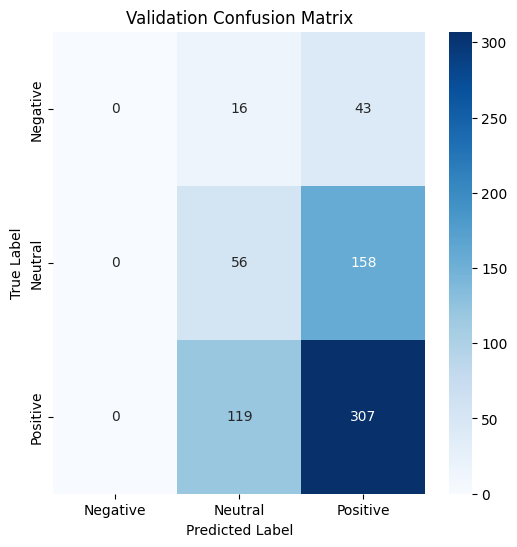

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 7, Loss: 1.0898265838623047
Epoch 7, Loss: 0.384102463722229
Epoch 7, Loss: 0.47474581003189087
Epoch 7, Loss: 0.6263099312782288
Epoch 7, Loss: 0.16470745205879211
Epoch 7, Loss: 0.1585184782743454
Epoch 7, Loss: 0.43746238946914673
Epoch 7, Loss: 0.35131409764289856
Epoch 7, Loss: 0.12413744628429413
Epoch 7, Loss: 0.4322541356086731
Epoch 7, Loss: 0.34370043873786926
Epoch 7, Loss: 0.42484569549560547
Epoch 7, Loss: 0.2835184931755066
Epoch 7, Loss: 0.28500157594680786
Epoch 7, Loss: 0.23771004378795624
Epoch 7, Loss: 0.3700917959213257
Epoch 7, Loss: 0.4437037408351898
Epoch 7, Loss: 0.17085376381874084
Epoch 7, Loss: 0.18885494768619537
Epoch 7, Loss: 0.12541230022907257
Epoch 7, Loss: 0.33102837204933167
Epoch 7, Loss: 0.3351735472679138
Epoch 7, Loss: 0.7076484560966492
Epoch 7, Loss: 0.3668162226676941
Epoch 7, Loss: 0.4001163840293884
Epoch 7, Loss: 0.33556538820266724
Epoch 7, Loss: 0.38278326392173767
Epoch 7, Loss: 0.35154974460601807
Epoch 7, Loss: 0.2480115890502929

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 7, Loss: 0.4214531481266022
Epoch 7, Loss: 0.30826249718666077
Epoch 7, Loss: 0.08313149213790894
Epoch 7, Loss: 0.2593126893043518
Epoch 7, Loss: 1.283509612083435
Epoch 7, Loss: 0.10447026044130325
Epoch 7, Loss: 0.07928896695375443
Epoch 7, Loss: 0.7030119895935059
Epoch 7, Loss: 0.283875048160553
Epoch 7, Loss: 0.3068777024745941
Epoch 7, Loss: 0.1381319910287857
Epoch 7, Loss: 0.5607870817184448
Epoch 7, Loss: 0.1385323703289032
Epoch 7, Loss: 0.1267012059688568
Epoch 7, Loss: 0.14962828159332275
Epoch 7, Loss: 0.13807106018066406
Epoch 7, Loss: 0.5218688249588013
Epoch 7, Loss: 0.18263351917266846
Epoch 7, Loss: 0.533189594745636
Epoch 7, Loss: 0.388302743434906
Epoch 7, Loss: 0.3238357901573181
Epoch 7, Loss: 0.7547059655189514
Epoch 7, Loss: 0.11537207663059235
Epoch 7, Loss: 0.45870012044906616
Epoch 7, Loss: 0.6777439117431641
Epoch 7, Loss: 0.14590227603912354
Epoch 7, Loss: 0.27873551845550537
Epoch 7, Loss: 0.1592424511909485
Epoch 7, Loss: 0.10561156272888184
Epoch 

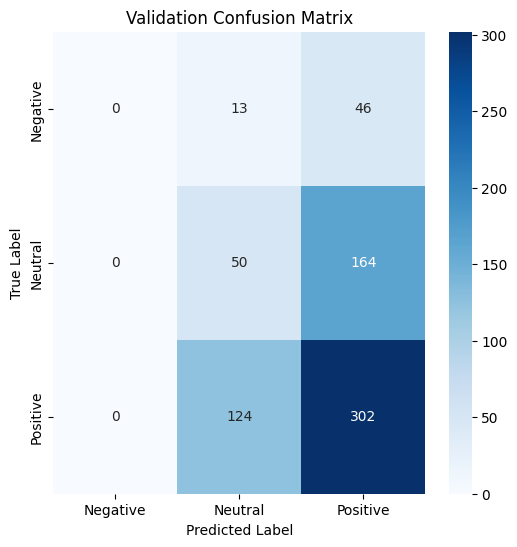

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 8, Loss: 0.04853159934282303
Epoch 8, Loss: 0.1053883507847786
Epoch 8, Loss: 0.5374534130096436
Epoch 8, Loss: 0.6715394854545593
Epoch 8, Loss: 0.13634607195854187
Epoch 8, Loss: 0.7006896734237671
Epoch 8, Loss: 0.2652580142021179
Epoch 8, Loss: 0.109425388276577
Epoch 8, Loss: 0.12002044916152954
Epoch 8, Loss: 0.2910144329071045
Epoch 8, Loss: 0.418489933013916
Epoch 8, Loss: 0.9018330574035645
Epoch 8, Loss: 0.7511959075927734
Epoch 8, Loss: 0.26860690116882324
Epoch 8, Loss: 0.09513146430253983
Epoch 8, Loss: 0.5647674202919006
Epoch 8, Loss: 0.8654856085777283
Epoch 8, Loss: 0.371405690908432
Epoch 8, Loss: 0.0890941172838211
Epoch 8, Loss: 0.11431431025266647
Epoch 8, Loss: 0.25383976101875305
Epoch 8, Loss: 0.11676988750696182
Epoch 8, Loss: 0.21059578657150269
Epoch 8, Loss: 0.13769832253456116
Epoch 8, Loss: 0.060532182455062866
Epoch 8, Loss: 0.1211438924074173
Epoch 8, Loss: 0.3053334653377533
Epoch 8, Loss: 0.27734631299972534
Epoch 8, Loss: 0.3680214285850525
Epoc

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 8, Loss: 0.16274382174015045
Epoch 8, Loss: 0.1841088980436325
Epoch 8, Loss: 0.22703714668750763
Epoch 8, Loss: 0.1981155425310135
Epoch 8, Loss: 0.19469113647937775
Epoch 8, Loss: 0.7464647889137268
Epoch 8, Loss: 0.04270314425230026
Epoch 8, Loss: 0.1815105676651001
Epoch 8, Loss: 0.1364704668521881
Epoch 8, Loss: 0.6575700044631958
Epoch 8, Loss: 0.8396501541137695
Epoch 8, Loss: 0.07282432913780212
Epoch 8, Loss: 0.23217763006687164
Epoch 8, Loss: 1.0282760858535767
Epoch 8, Loss: 0.29804643988609314
Epoch 8, Loss: 0.3587407171726227
Epoch 8, Loss: 0.2960854470729828
Epoch 8, Loss: 0.14249546825885773
Epoch 8, Loss: 0.13858643174171448
Epoch 8, Loss: 0.13245701789855957
Epoch 8, Loss: 0.13092643022537231
Epoch 8, Loss: 0.11707687377929688
Epoch 8, Loss: 0.759602427482605
Epoch 8, Loss: 0.4922034442424774
Epoch 8, Loss: 0.3385315239429474
Epoch 8, Loss: 0.07823050767183304
Epoch 8, Loss: 0.11718545854091644
Epoch 8, Loss: 0.0942731723189354
Epoch 8, Loss: 0.13772016763687134


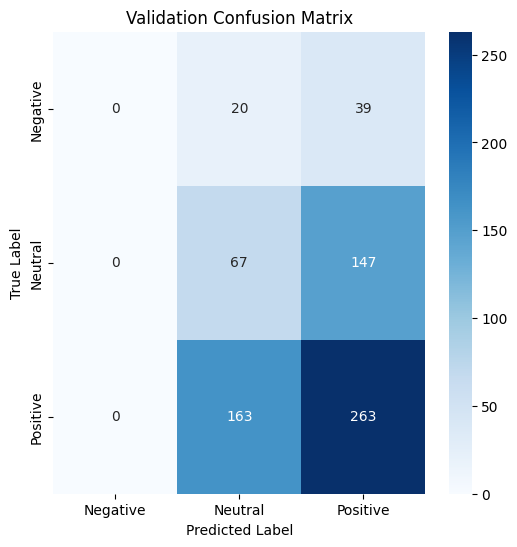

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 9, Loss: 0.5019533634185791
Epoch 9, Loss: 0.2224428653717041
Epoch 9, Loss: 0.6423878073692322
Epoch 9, Loss: 0.4667802155017853
Epoch 9, Loss: 0.11193409562110901
Epoch 9, Loss: 0.6652593016624451
Epoch 9, Loss: 0.41958191990852356
Epoch 9, Loss: 0.2270704209804535
Epoch 9, Loss: 0.7716407775878906
Epoch 9, Loss: 0.2283768653869629
Epoch 9, Loss: 0.0673845112323761
Epoch 9, Loss: 0.45257484912872314
Epoch 9, Loss: 0.3662140667438507
Epoch 9, Loss: 0.5539550185203552
Epoch 9, Loss: 0.2742871046066284
Epoch 9, Loss: 0.07701590657234192
Epoch 9, Loss: 0.20796862244606018
Epoch 9, Loss: 0.2432909607887268
Epoch 9, Loss: 0.5236989855766296
Epoch 9, Loss: 0.07986760884523392
Epoch 9, Loss: 0.1472567319869995
Epoch 9, Loss: 0.2273021787405014
Epoch 9, Loss: 0.0947825089097023
Epoch 9, Loss: 0.0507127121090889
Epoch 9, Loss: 0.9927863478660583
Epoch 9, Loss: 0.5781531929969788
Epoch 9, Loss: 0.42061951756477356
Epoch 9, Loss: 0.20076331496238708
Epoch 9, Loss: 0.369552344083786
Epoch 9

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 9, Loss: 0.3751109838485718
Epoch 9, Loss: 0.35355910658836365
Epoch 9, Loss: 0.10074467957019806
Epoch 9, Loss: 0.5087020993232727
加载图像 /content/drive/MyDrive/emotion_analysis/images/image_5119.png 时出错：image file is truncated
Epoch 9, Loss: 0.07683038711547852
Epoch 9, Loss: 0.06573675572872162
Epoch 9, Loss: 0.5326180458068848
Epoch 9, Loss: 0.19116179645061493
Epoch 9, Loss: 0.012472935952246189
Epoch 9, Loss: 0.38774096965789795
Epoch 9, Loss: 0.015989242121577263
Epoch 9, Loss: 0.03601991385221481
Epoch 9, Loss: 0.19984860718250275
Epoch 9, Loss: 0.1691541075706482
Epoch 9, Loss: 0.20424973964691162
Epoch 9, Loss: 0.1685369610786438
Epoch 9, Loss: 0.12452243268489838
Epoch 9, Loss: 0.40280500054359436
Epoch 9, Loss: 0.4287245273590088
Epoch 9, Loss: 0.07833997160196304
Epoch 9, Loss: 0.23518221080303192
Epoch 9, Loss: 0.12398485094308853
Epoch 9, Loss: 0.07847951352596283
Epoch 9, Loss: 0.05805494636297226
Epoch 9, Loss: 0.19400033354759216
Epoch 9, Loss: 0.7021798491477966


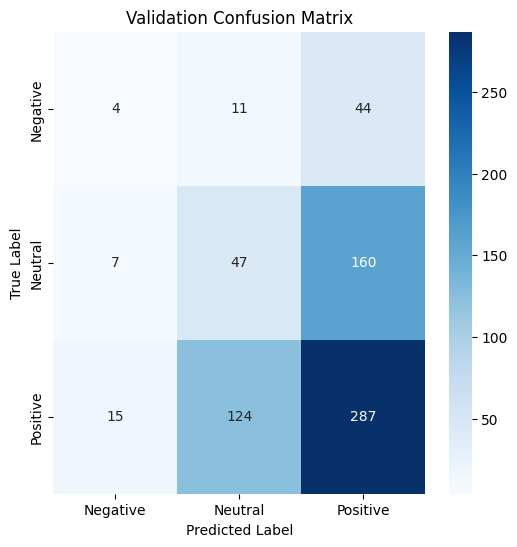

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch 10, Loss: 0.056560397148132324
Epoch 10, Loss: 0.8115121722221375
Epoch 10, Loss: 0.06346748024225235
Epoch 10, Loss: 0.1614961475133896
Epoch 10, Loss: 0.04594549164175987
Epoch 10, Loss: 0.026518497616052628
Epoch 10, Loss: 0.09022213518619537
Epoch 10, Loss: 0.5764650106430054
Epoch 10, Loss: 0.03925027325749397
Epoch 10, Loss: 0.1976756453514099
Epoch 10, Loss: 0.21258823573589325
Epoch 10, Loss: 0.0492393895983696
Epoch 10, Loss: 0.28949373960494995
Epoch 10, Loss: 0.20737776160240173
Epoch 10, Loss: 0.3830939829349518
Epoch 10, Loss: 0.3010944426059723
Epoch 10, Loss: 0.631560742855072
Epoch 10, Loss: 0.0423738956451416
Epoch 10, Loss: 0.41408127546310425
Epoch 10, Loss: 0.04512069746851921
Epoch 10, Loss: 0.17124974727630615
Epoch 10, Loss: 0.26503193378448486
Epoch 10, Loss: 0.6941576600074768
Epoch 10, Loss: 0.13187077641487122
Epoch 10, Loss: 0.02507135458290577
Epoch 10, Loss: 0.06171226501464844
Epoch 10, Loss: 0.14814335107803345
Epoch 10, Loss: 0.7209003567695618
Ep

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 10, Loss: 0.4759616553783417
Epoch 10, Loss: 0.09137415140867233
Epoch 10, Loss: 0.19962850213050842
Epoch 10, Loss: 0.1288711130619049
Epoch 10, Loss: 0.3588171601295471
Epoch 10, Loss: 0.12783503532409668
Epoch 10, Loss: 0.14922918379306793
Epoch 10, Loss: 0.276946097612381
Epoch 10, Loss: 0.28382596373558044
Epoch 10, Loss: 0.0746135339140892
Epoch 10, Loss: 0.04825079068541527
Epoch 10, Loss: 0.09857551753520966
Epoch 10, Loss: 0.6120971441268921
Epoch 10, Loss: 0.9403595924377441
Epoch 10, Loss: 0.057033341377973557
Epoch 10, Loss: 0.06791351735591888
Epoch 10, Loss: 0.09447474777698517
Epoch 10, Loss: 0.02396177127957344
Epoch 10, Loss: 0.2572416067123413
Epoch 10, Loss: 0.1322380006313324
Epoch 10, Loss: 0.17131400108337402
Epoch 10, Loss: 0.336913138628006
Epoch 10, Loss: 0.2753644287586212
Epoch 10, Loss: 0.4083113670349121
Epoch 10, Loss: 0.13962608575820923
Epoch 10, Loss: 0.09163766354322433
Epoch 10, Loss: 0.057896919548511505
Epoch 10, Loss: 0.21198593080043793
Epoc

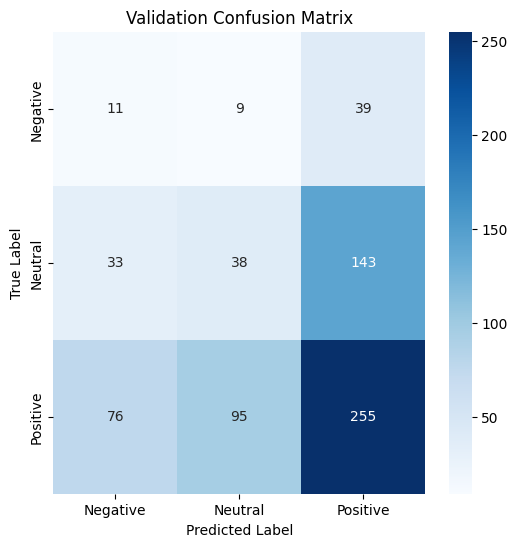

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test Accuracy: 0.4464
Test F1 Score: 0.4577
Test Confusion Matrix:
[[  9  11  37]
 [ 50  58 126]
 [ 76  87 245]]


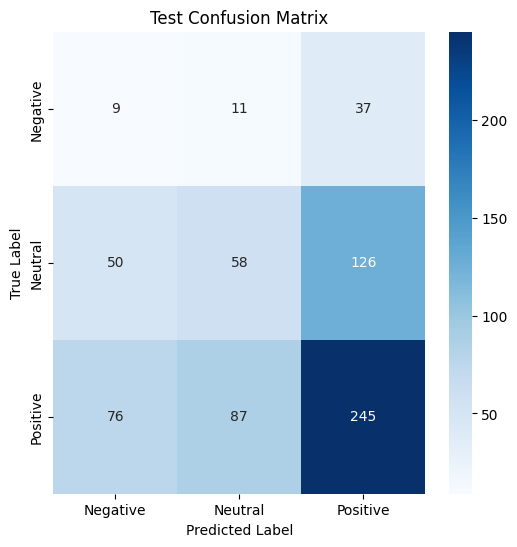

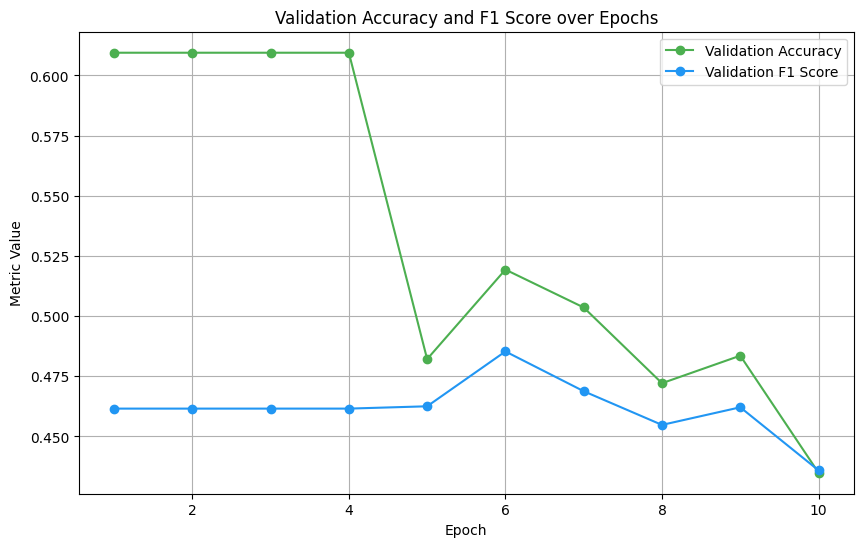

In [6]:
%matplotlib inline
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def custom_collate_fn(batch):
    batch = [item for item in batch if item is not None]
    if len(batch) == 0:
        return None
    input_ids = torch.stack([item[0] for item in batch])
    token_type_ids = torch.stack([item[1] for item in batch])
    attention_mask = torch.stack([item[2] for item in batch])
    pixel_values = torch.stack([item[3] for item in batch])
    labels = torch.stack([item[4] for item in batch])
    return input_ids, token_type_ids, attention_mask, pixel_values, labels

# Datasets and Data Loaders
train_dataset = MultimodalDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=custom_collate_fn)
val_dataset = MultimodalDataset(val_data)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=custom_collate_fn)
test_dataset = MultimodalDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=custom_collate_fn)

# Classifier Model
class FlavaClassifier(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.flava = flava_model
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),  
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, input_ids, token_type_ids, attention_mask, pixel_values):
        outputs = self.flava(input_ids=input_ids, token_type_ids=token_type_ids,
                             attention_mask=attention_mask, pixel_values=pixel_values)
        if hasattr(outputs.multimodal_embeddings, 'pooler_output'):
            pooled_output = outputs.multimodal_embeddings.pooler_output
        else:
            # Manual pooling: average last_hidden_state
            pooled_output = outputs.multimodal_embeddings.mean(dim=1)  # [batch_size, hidden_size]
        return self.classifier(pooled_output)

# Define divices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Models, optimizers, and loss functions
model = FlavaClassifier().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Plotting the confusion matrix
def plot_confusion_matrix(cm, dataset_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Evaluation function
def evaluate(model, data_loader, device, dataset_name="Validation"):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculation
        for batch in data_loader:
            if batch is None:
                continue
            input_ids, token_type_ids, attention_mask, pixel_values, labels = [x.to(device) for x in batch]
            outputs = model(input_ids, token_type_ids, attention_mask, pixel_values)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')  # Use weighted averaging to handle class imbalance

     # Calculate the confusion matrix
    cm = confusion_matrix(all_labels, all_preds, labels=[0, 1, 2])

    # Printing evaluation results
    print(f"{dataset_name} Accuracy: {accuracy:.4f}")
    print(f"{dataset_name} F1 Score: {f1:.4f}")
    print(f"{dataset_name} Confusion Matrix:\n{cm}")
    plot_confusion_matrix(cm, dataset_name)

    return accuracy, f1, cm

val_accuracies = []
val_f1_scores = []
best_val_accuracy = 0

# Training loop
for epoch in range(10):
    model.train()
    for batch in train_loader:
        if batch is None:
            continue
        input_ids, token_type_ids, attention_mask, pixel_values, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, token_type_ids, attention_mask, pixel_values)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    # Evaluate the validation set after each epoch
    val_accuracy, val_f1, val_cm = evaluate(model, val_loader, device, dataset_name="Validation")

    # Recording Metrics
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)

    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), '/content/drive/MyDrive/emotion_analysis/best_model.pth')
        print(f"Epoch {epoch+1}: New best validation accuracy ({best_val_accuracy:.4f}), model saved.")

# After training, evaluate the test set
test_accuracy, test_f1, test_cm = evaluate(model, test_loader, device, dataset_name="Test")

# Plotting the accuracy and F1 score trends
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy", marker='o', color="#4CAF50")
plt.plot(range(1, 11), val_f1_scores, label="Validation F1 Score", marker='o', color="#2196F3")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Validation Accuracy and F1 Score over Epochs")
plt.legend()
plt.grid(True)
plt.show()